In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2021, 1, 1)

In [3]:
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks_data = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [5]:
bank_stocks_data.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.106022   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.743805   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.787277   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.736588   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.758293   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.364143  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.389084  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.488850  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.526291  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.912937  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.523806  
2006-01-04  31.530001  10870000.0  20.285759  
2006-01-05  31.495001  10158000.0  20.263241  
2006-01-06  31.680000   8403800.0  20.382265  
2006-01-09  31.674999   5619600.0  20.379051  

[5 rows x 36 columns]

In [9]:
bank_stocks_data.columns.names = ['Banks:', 'Stock Info']

In [10]:
bank_stocks_data.head()

Banks:            BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.106022   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.743805   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.787277   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.736588   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.758293   

Banks:               C                                      ...         MS  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Banks:                                             WFC                        \
Stock Info      Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.364143  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.389084  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.488850  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.526291  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.912937  31.825001  31.555000  31.674999   

Banks:                                        
Stock Info      Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.523806  
2006-01-04  31.530001  10870000.0  20.285759  
2006-01-05  31.495001  10158000.0  20.263241  
2006-01-06  31.680000   8403800.0  20.382265  
2006-01-09  31.674999   5619600.0  20.379051  

[5 rows x 36 columns]

In [11]:
# the highest closing price for each bank's stock
bank_stocks_data.xs(key='Close', axis=1, level='Stock Info').max()

Banks:
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

In [12]:
# Create a new DataFrame, Returns
returns = pd.DataFrame()
for x in tickers:
    returns[x+' Return'] = bank_stocks_data[x]['Close'].pct_change()

In [13]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


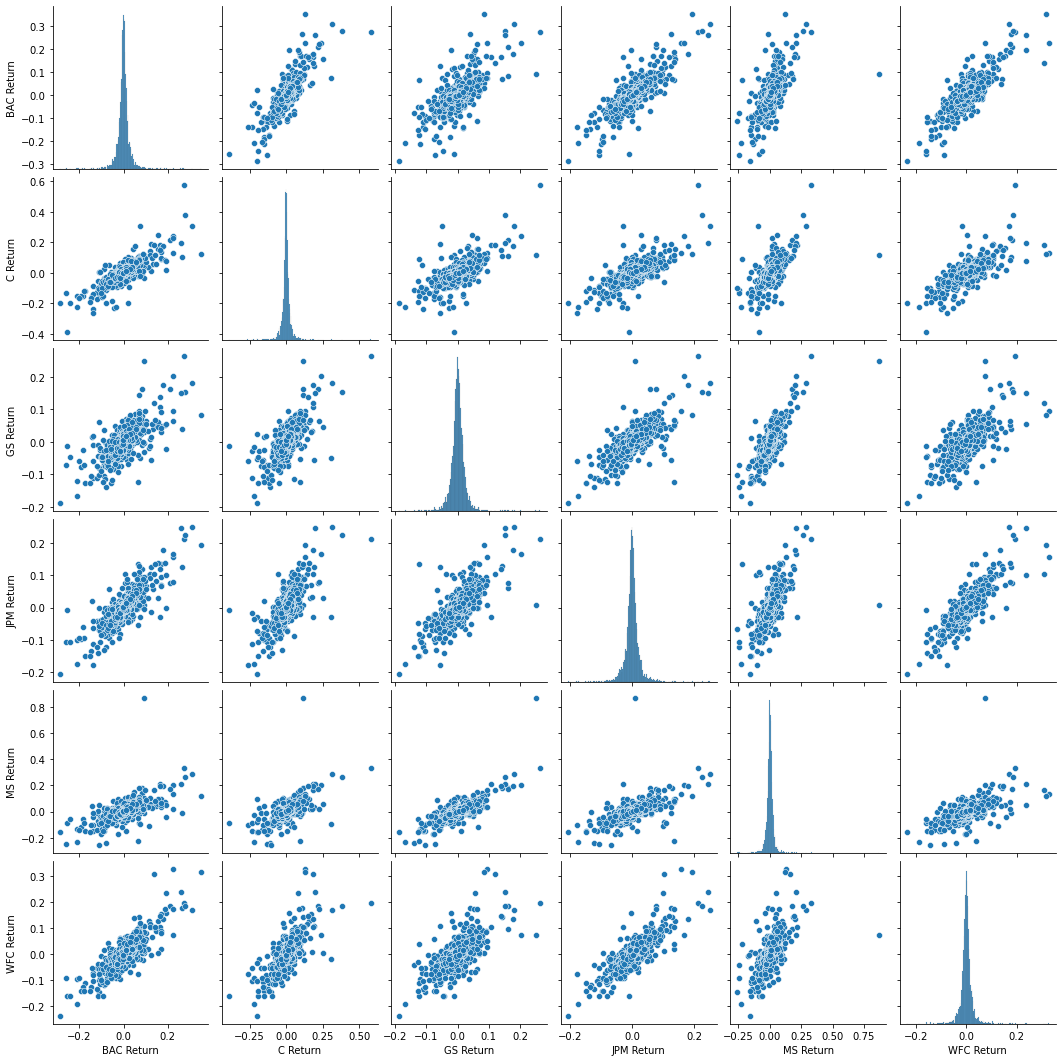

In [14]:
sns.pairplot(returns[1:])

In [15]:
# Check for the dates of best and worst return for each bank
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
# Checking the standard deviation of the return
returns.std()

BAC Return    0.032495
C Return      0.034400
GS Return     0.023742
JPM Return    0.025178
MS Return     0.033381
WFC Return    0.027519
dtype: float64

In [19]:
# standard deviation for the 2021 year 
returns.loc['2020-01-01':'2020-12-31'].std()

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

Text(0.5, 1.0, 'Morgan Stanley 2020 returns')

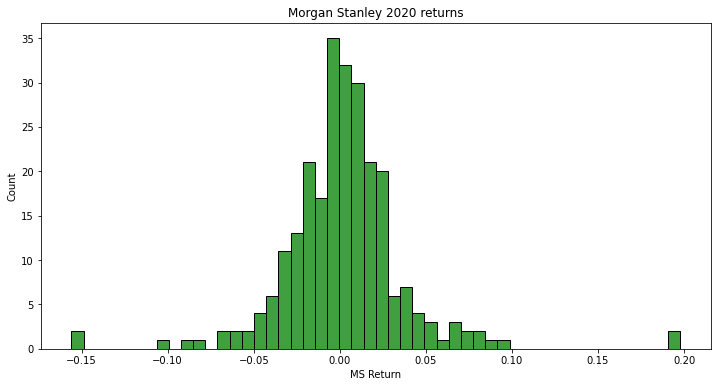

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(returns.loc['2020-01-01':'2020-12-31']['MS Return'], color='green', bins=50)
plt.title('Morgan Stanley 2020 returns')

Text(0.5, 1.0, 'CitiGroup 2008 returns')

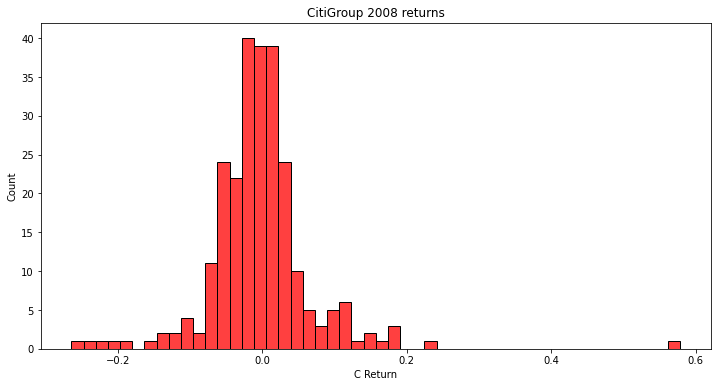

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)
plt.title('CitiGroup 2008 returns')

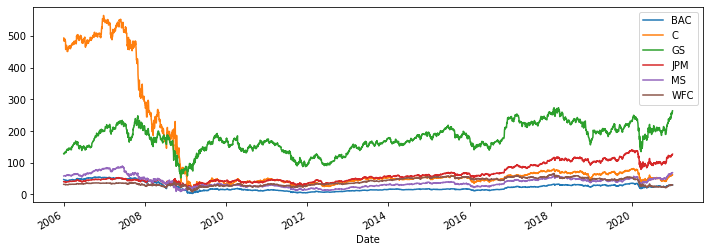

In [28]:
# Showing the closing price for each bank
for x in tickers:
    bank_stocks_data[x]['Close'].plot(label=x, figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

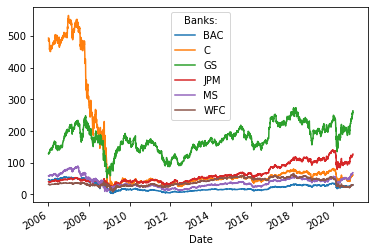

In [29]:
bank_stocks_data.xs(key='Close',axis=1, level='Stock Info').plot()

In [30]:
bank_stocks_data.xs(key='Close',axis=1, level='Stock Info').iplot()

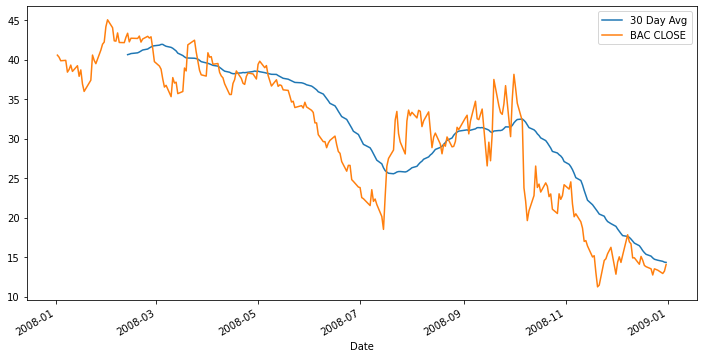

In [31]:
# plot the rolling average aginst the closing price in 2008 for Bank of America
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Banks:', ylabel='Banks:'>

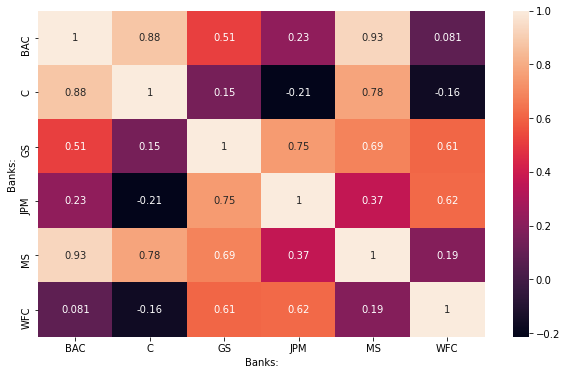

In [33]:
# a heat map to show the correlation between the stocks close price
plt.figure(figsize=(10,6))
sns.heatmap(bank_stocks_data.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

<Figure size 720x432 with 0 Axes>

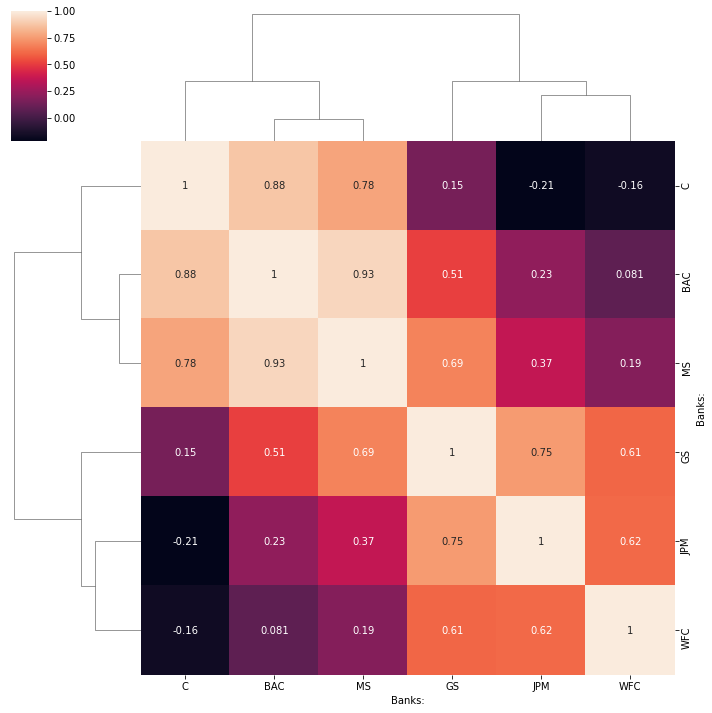

In [34]:
plt.figure(figsize=(10,6))
sns.clustermap(bank_stocks_data.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

In [35]:
close_corr = bank_stocks_data.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [37]:
# Create a candle plot for Bank of America in 2019
bac19 = BAC[['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2020-01-01']
bac19.iplot(kind='candle')

In [38]:
# Create a simple moving average plot of Morgan Stanley for the year 2019
MS['Close'].loc['2019-01-01':'2020-01-01'].ta_plot(study='sma', periods=[13,21,55])

In [40]:
# Create a Bollinger Band average Band plot for Bank of America for the year 2019
BAC['Close'].loc['2019-01-01':'2020-01-01'].ta_plot(study='boll')